# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [9]:
# Set the API base URL
BASE_URL = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=imperial"


### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=50)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=50)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 41


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{BASE_URL}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | forked river
Processing Record 3 of Set 1 | tanjung selor
City not found. Skipping...
Processing Record 4 of Set 1 | rubtsovsk
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | port mathurin
Processing Record 7 of Set 1 | luderitz
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | talnakh
Processing Record 10 of Set 1 | papatowai
Processing Record 11 of Set 1 | saipan
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | stiens
Processing Record 17 of Set 1 | kimbe
Processing Record 18 of Set 1 | isafjordur
Processing Record 19 of Set 1 | prado
Processing Record 20 of Set 1 | ugoofaaru
Processing Record 21 of Set 1 | west island
Processing Record 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          45
Lat           45
Lng           45
Max Temp      45
Humidity      45
Cloudiness    45
Wind Speed    45
Country       45
Date          45
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,57.65,72,100,3.44,CL,1706636400
1,forked river,39.8398,-74.1901,41.11,69,100,5.99,US,1706636400
2,rubtsovsk,51.5000,81.2500,-6.03,97,52,3.13,RU,1706636402
3,bethel,41.3712,-73.4140,36.36,66,100,3.44,US,1706636402
4,port mathurin,-19.6833,63.4167,82.02,77,100,19.80,MU,1706636403


In [12]:
# Create the 'output_data' directory if it doesn't exist
output_directory = "output_data"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
    
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,57.65,72,100,3.44,CL,1706636400
1,forked river,39.8398,-74.1901,41.11,69,100,5.99,US,1706636400
2,rubtsovsk,51.5000,81.2500,-6.03,97,52,3.13,RU,1706636402
3,bethel,41.3712,-73.4140,36.36,66,100,3.44,US,1706636402
4,port mathurin,-19.6833,63.4167,82.02,77,100,19.80,MU,1706636403


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

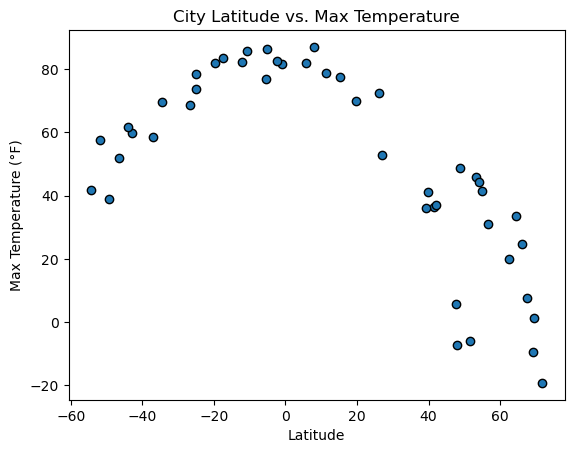

In [38]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

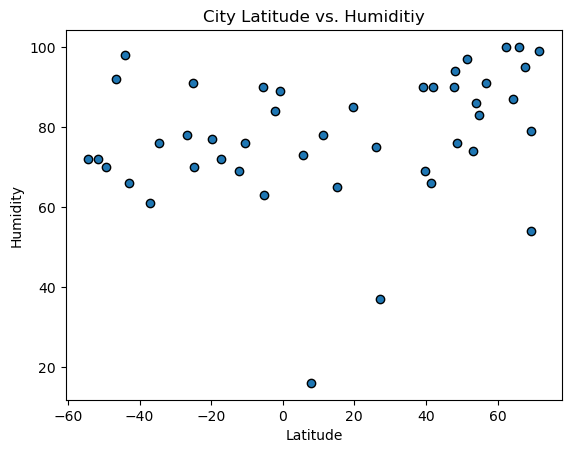

In [39]:
# Build the scatter plots for latitude vs. humidity
southern_df = city_data_df[city_data_df["Lat"] < 0]
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humiditiy")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

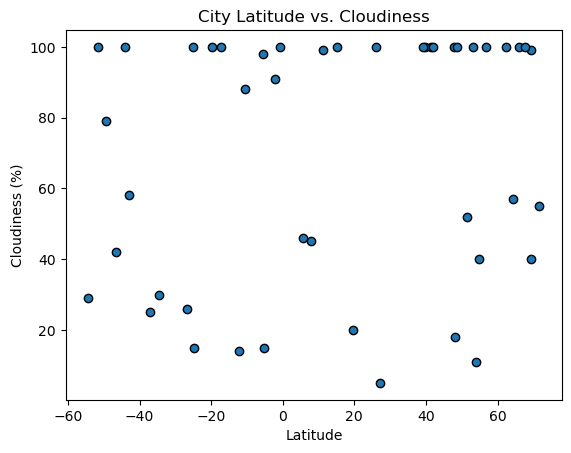

In [41]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

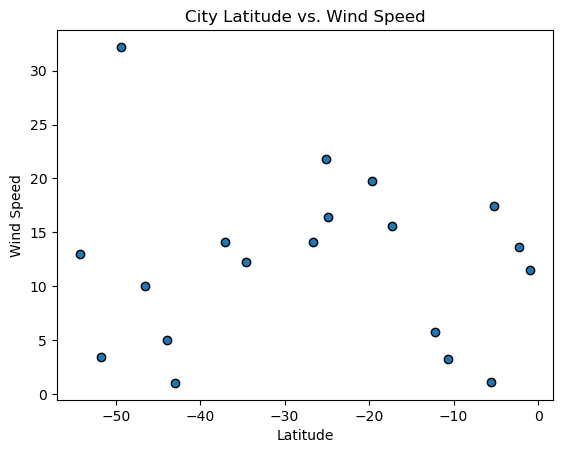

In [42]:
# Build the scatter plots for latitude vs. humidity
southern_df = city_data_df[city_data_df["Lat"] < 0]
plt.scatter(southern_df["Lat"], southern_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [43]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [44]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,forked river,39.8398,-74.1901,41.11,69,100,5.99,US,1706636400
2,rubtsovsk,51.5000,81.2500,-6.03,97,52,3.13,RU,1706636402
3,bethel,41.3712,-73.4140,36.36,66,100,3.44,US,1706636402
7,talnakh,69.4865,88.3972,1.20,79,99,11.36,RU,1706636405
9,saipan,15.1355,145.7010,77.70,65,100,17.27,MP,1706636406


In [45]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,57.65,72,100,3.44,CL,1706636400
4,port mathurin,-19.6833,63.4167,82.02,77,100,19.80,MU,1706636403
5,luderitz,-26.6481,15.1594,68.79,78,26,14.05,NaN,1706636404
6,adamstown,-25.0660,-130.1015,73.76,91,100,21.79,PN,1706636404
8,papatowai,-46.5619,169.4708,51.98,92,42,10.00,NZ,1706636405


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8452805466006738


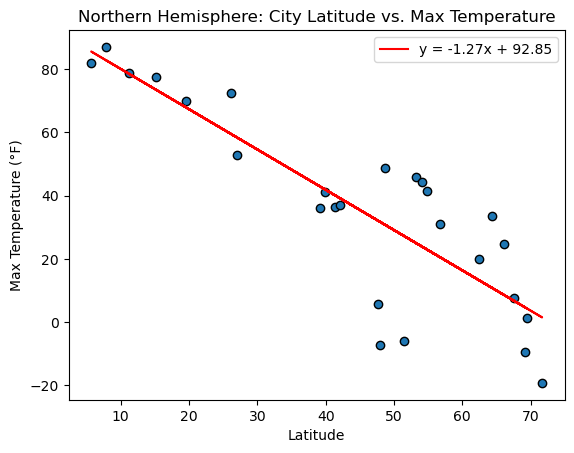

In [46]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_df["Lat"], northern_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties

plt.title("Northern Hemisphere: City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")

# Calculate and plot the linear regression
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x_values, regress_values, "r-", label=line_eq)
plt.legend()
print(f"The r-value is {rvalue}")

The r-value is 0.9055736722628285


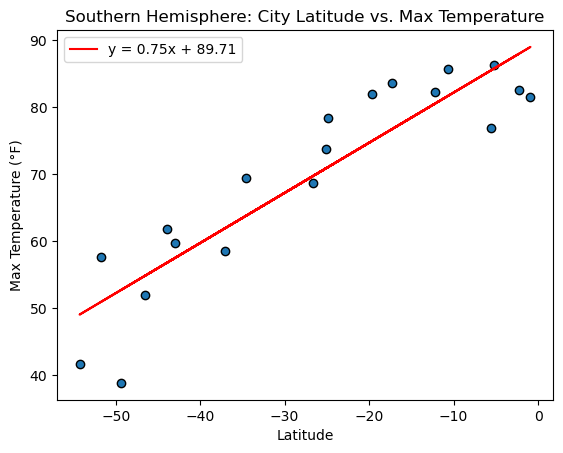

In [47]:
# Linear regression on Southern Hemisphere
southern_df = city_data_df[city_data_df["Lat"] < 0]
plt.scatter(southern_df["Lat"], southern_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("Southern Hemisphere: City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x_values, regress_values, "r-", label=line_eq)
plt.legend()
print(f"The r-value is {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.5341245077958129


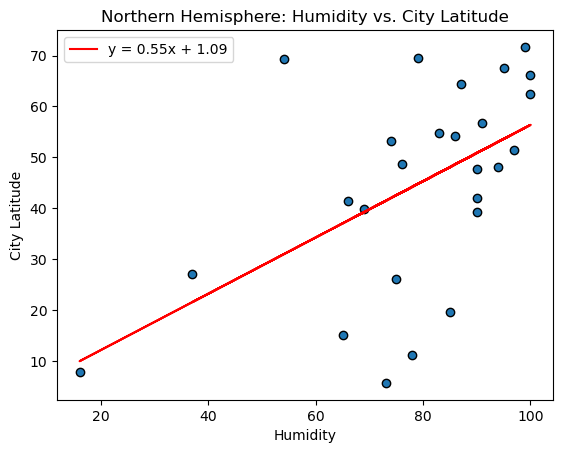

In [48]:
# Northern Hemisphere
plt.scatter(northern_df["Humidity"], northern_df["Lat"], marker="o", edgecolors="black")

# Incorporate the other graph properties

plt.title("Northern Hemisphere: Humidity vs. City Latitude")
plt.xlabel("Humidity")
plt.ylabel("City Latitude")

# Calculate and plot the linear regression
x_values = northern_df["Humidity"]
y_values = northern_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x_values, regress_values, "r-", label=line_eq)
plt.legend()
print(f"The r-value is {rvalue}")

The r-value is 0.11643040620083762


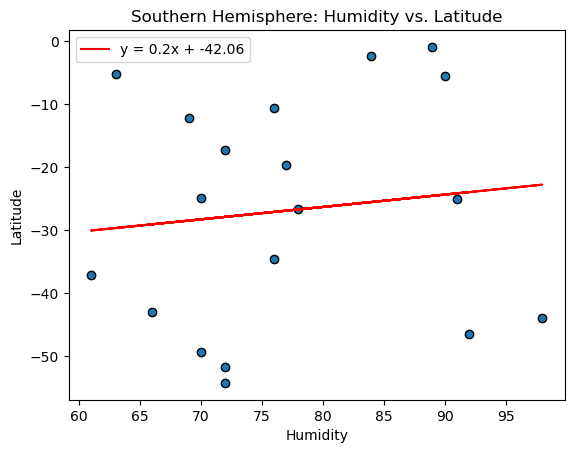

In [49]:
# Southern Hemisphere
plt.scatter(southern_df["Humidity"], southern_df["Lat"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("Southern Hemisphere: Humidity vs. Latitude")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
x_values = southern_df["Humidity"]
y_values = southern_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x_values, regress_values, "r-", label=line_eq)
plt.legend()
print(f"The r-value is {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.12609753100575216


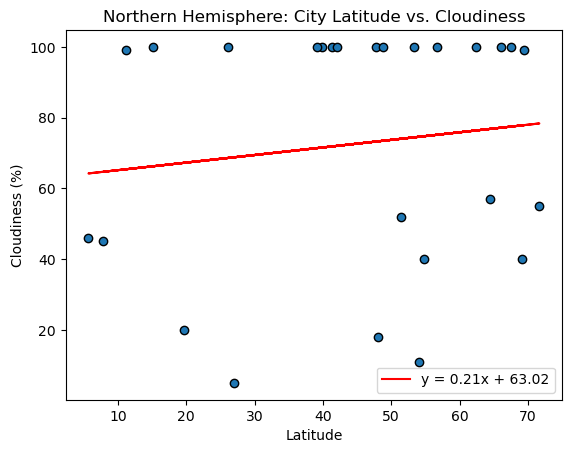

In [50]:
# Northern Hemisphere
plt.scatter(northern_df["Lat"], northern_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties

plt.title("Northern Hemisphere: City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Calculate and plot the linear regression
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x_values, regress_values, "r-", label=line_eq)
plt.legend()
print(f"The r-value is {rvalue}")

The r-value is 0.1516115183463752


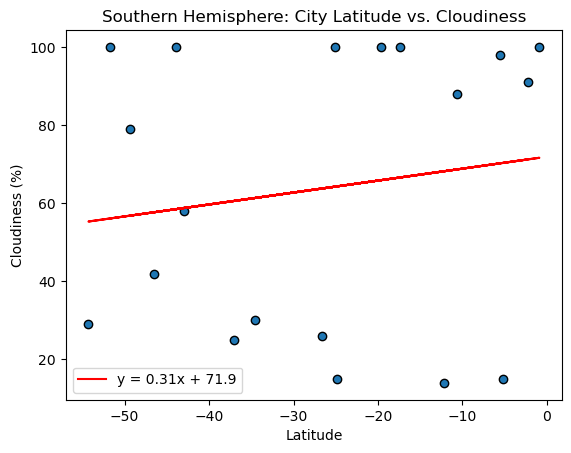

In [51]:
# Southern Hemisphere
southern_df = city_data_df[city_data_df["Lat"] < 0]
plt.scatter(southern_df["Lat"], southern_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("Southern Hemisphere: City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x_values, regress_values, "r-", label=line_eq)
plt.legend()
print(f"The r-value is {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.17197211513573965


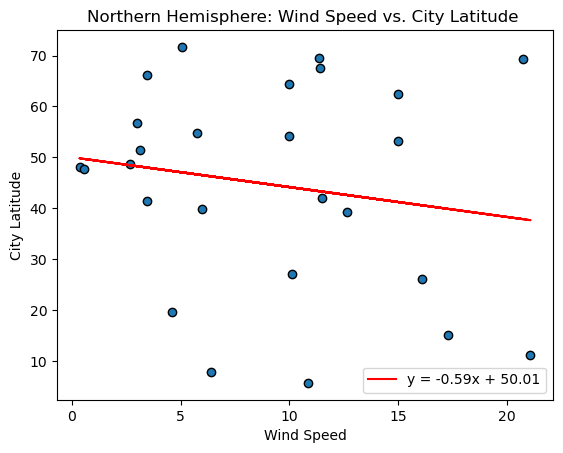

In [52]:
# Northern Hemisphere
plt.scatter(northern_df["Wind Speed"], northern_df["Lat"], marker="o", edgecolors="black")

# Incorporate the other graph properties

plt.title("Northern Hemisphere: Wind Speed vs. City Latitude ")
plt.xlabel("Wind Speed")
plt.ylabel("City Latitude")

# Calculate and plot the linear regression
x_values = northern_df["Wind Speed"]
y_values = northern_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x_values, regress_values, "r-", label=line_eq)
plt.legend()

print(f"The r-value is {rvalue}")

The r-value is -0.06301790209257603


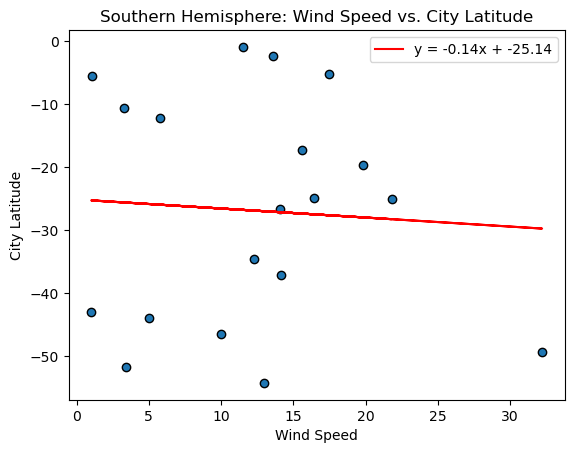

In [53]:
# Southern Hemisphere
southern_df = city_data_df[city_data_df["Lat"] < 0]
plt.scatter(southern_df["Wind Speed"], southern_df["Lat"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("Southern Hemisphere: Wind Speed vs. City Latitude")
plt.xlabel("Wind Speed")
plt.ylabel("City Latitude")

#Calculate Linear Regressions
x_values = southern_df["Wind Speed"]
y_values = southern_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x_values, regress_values, "r-", label=line_eq)
plt.legend()

print(f"The r-value is {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE